In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gzip, os, sys

In [2]:
PATH_FROM_WEEK3 = '../Week3/generative-mnist/'
def load_mnist_images(filename):
    filename = PATH_FROM_WEEK3 + filename
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)
    return data

def load_mnist_labels(filename):
    filename = PATH_FROM_WEEK3 + filename
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

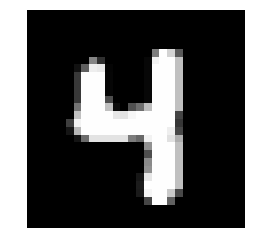

In [5]:
displaychar(train_data[58])

In [6]:
train_data.shape, train_labels.shape

((60000, 784), (60000,))

In [7]:
def accuracy(a,b):
    total = len(a)
    correct = sum(a == b)
    return (correct*100.0/total)

In [8]:
from sklearn.svm import LinearSVC

C = [0.01, 0.1, 1.0, 10.0, 100.0]
for c_val in  C:
    svm_clf = LinearSVC(C = c_val, loss='hinge', random_state=0)
    svm_clf.fit(train_data, train_labels)
    labels_pred = svm_clf.predict(test_data)
    print("C = {0}, accuracy = {1}".format(c_val, accuracy(labels_pred, test_labels)))

C = 0.01, accuracy = 88.15
C = 0.1, accuracy = 88.15
C = 1.0, accuracy = 88.15
C = 10.0, accuracy = 88.15
C = 100.0, accuracy = 88.15


In [9]:
from sklearn.svm import SVC

svc_clf = SVC(C=0.1, kernel='poly', degree=2)
svc_clf.fit(train_data, train_labels)
labels_pred = svc_clf.predict(test_data)
print(accuracy(labels_pred, test_labels))

98.06
